In [1]:
import sys
from math import sqrt

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import bokeh
from bokeh.io import show, output_notebook, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, StaticLayoutProvider
from bokeh.models import HoverTool, BoxZoomTool, ResetTool
from bokeh.models.graphs import from_networkx

In [2]:
print('NetworkX: {}'.format(nx.__version__))
print('Bokeh: {}'.format(bokeh.__version__))
print('Python: {}.{}.{}'.format(sys.version_info.major, sys.version_info.minor, sys.version_info.micro))

NetworkX: 2.2
Bokeh: 0+unknown
Python: 3.6.2


# Prepare Data

/Users/tomoko/anaconda/envs/pepmap_env/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


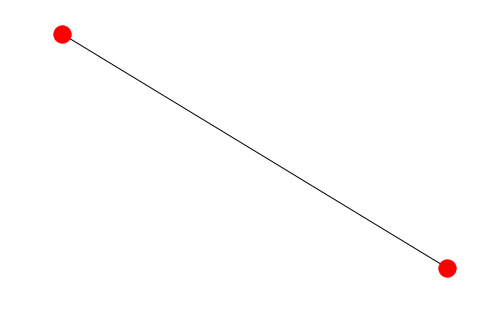

In [3]:
node_datasource_for_nx = [(1, {'size': 10, 'size_a': 10, 'size_b': 20}),
                          (2,{'size': 10, 'size_a': 10, 'size_b': 20})]

edge_datasource_for_nx = [(1, 2, {})]

G = nx.Graph()
G.add_nodes_from(node_datasource_for_nx)
G.add_edges_from(edge_datasource_for_nx)

fig = plt.figure()
pos = nx.spring_layout(G)
nx.draw(G)
plt.show()

# Switch node size by a radio button
- radio group
    + https://bokeh.pydata.org/en/latest/docs/user_guide/interaction/widgets.html#radio-group
- CustomJS with a Python function
    + http://bokeh.pydata.org/en/latest/docs/user_guide/interaction/callbacks.html#customjs-with-a-python-function

In [4]:
from bokeh.layouts import widgetbox
from bokeh.models.widgets import RadioGroup, Slider
from bokeh.layouts import row, column
from bokeh.models import CustomJS

In [5]:
# Convert a graph to Bokeh
graph_renderer = from_networkx(G, nx.spring_layout)

In [6]:
# Setup a widget
source = graph_renderer.node_renderer.data_source

def callback_update(source=source):
    radio_dict = {0: 'size_a',
                  1: 'size_b'}
    
    data = source.data
    selected_value = cb_obj.active
    data['size'] = data[radio_dict[selected_value]]
    source.change.emit()
    
radio_group = RadioGroup(labels=["Size A", "Size B"],
                         active=0,
                         callback=CustomJS.from_py_func(callback_update))

In [7]:
# Show
plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

graph_renderer.node_renderer.glyph = Circle(size='size')
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC",
                                               line_alpha=0.8,
                                               line_width=1)
plot.renderers.append(graph_renderer)

output_notebook()
show(column([radio_group, plot]))

Loading BokehJS ...

# Adjust node size by a slider

In [8]:
# Convert a graph to Bokeh
graph_renderer = from_networkx(G, nx.spring_layout)

In [9]:
# Setup a widget
source = graph_renderer.node_renderer.data_source

def callback_update(source=source):
    data = source.data
    adjust_value = cb_obj.value
    print(adjust_value)
    new_data = []
    for value in data['size_a']:
        new_data.append(value * adjust_value)
    data['size'] = new_data
    print(data['size'])
    source.change.emit()
    
slider = Slider(start=0, end=10, value=1, step=.1,
                callback=CustomJS.from_py_func(callback_update))

In [10]:
# Show
plot = Plot(plot_width=300, plot_height=300,
            x_range=Range1d(-1.1, 1.1), y_range=Range1d(-1.1, 1.1))

graph_renderer.node_renderer.glyph = Circle(size='size')
graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC",
                                               line_alpha=0.8,
                                               line_width=1)
plot.renderers.append(graph_renderer)

output_notebook()
show(column([slider, plot]))

Loading BokehJS ...